In [2]:
import numpy as np
from utils.misc import load_pickle
from utils.dataset import preprocess

from tslearn.clustering import TimeSeriesKMeans

folder = '/home/minh/PycharmProjects/prostate_cancer_classification_v1/datasets'
filename = 'BK_RF_P1_140_balance__20210203-175808_mimic.pkl'
data_file = '/'.join((folder, filename))


input_data = load_pickle(data_file)
input_data = preprocess(input_data, to_norm=False)

data_train = input_data["data_train"]
label_train = input_data["label_train"]
inv_train = input_data["inv_train"]
CoreN_train = input_data["corename_train"].astype(np.float)

In [7]:
import matplotlib
%matplotlib inline

In [9]:
n_clusters = 30
perc = .1

In [10]:
X = data_train[0][..., np.newaxis]
step = int(len(X) // (len(X) * perc))

km_dba = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", 
                          max_iter=5, max_iter_barycenter=5,
                          random_state=0).fit(X[::step])
print(km_dba.cluster_centers_.shape)

(30, 200, 1)


In [11]:
X = data_train[0][..., np.newaxis]
y = km_dba.predict(X)

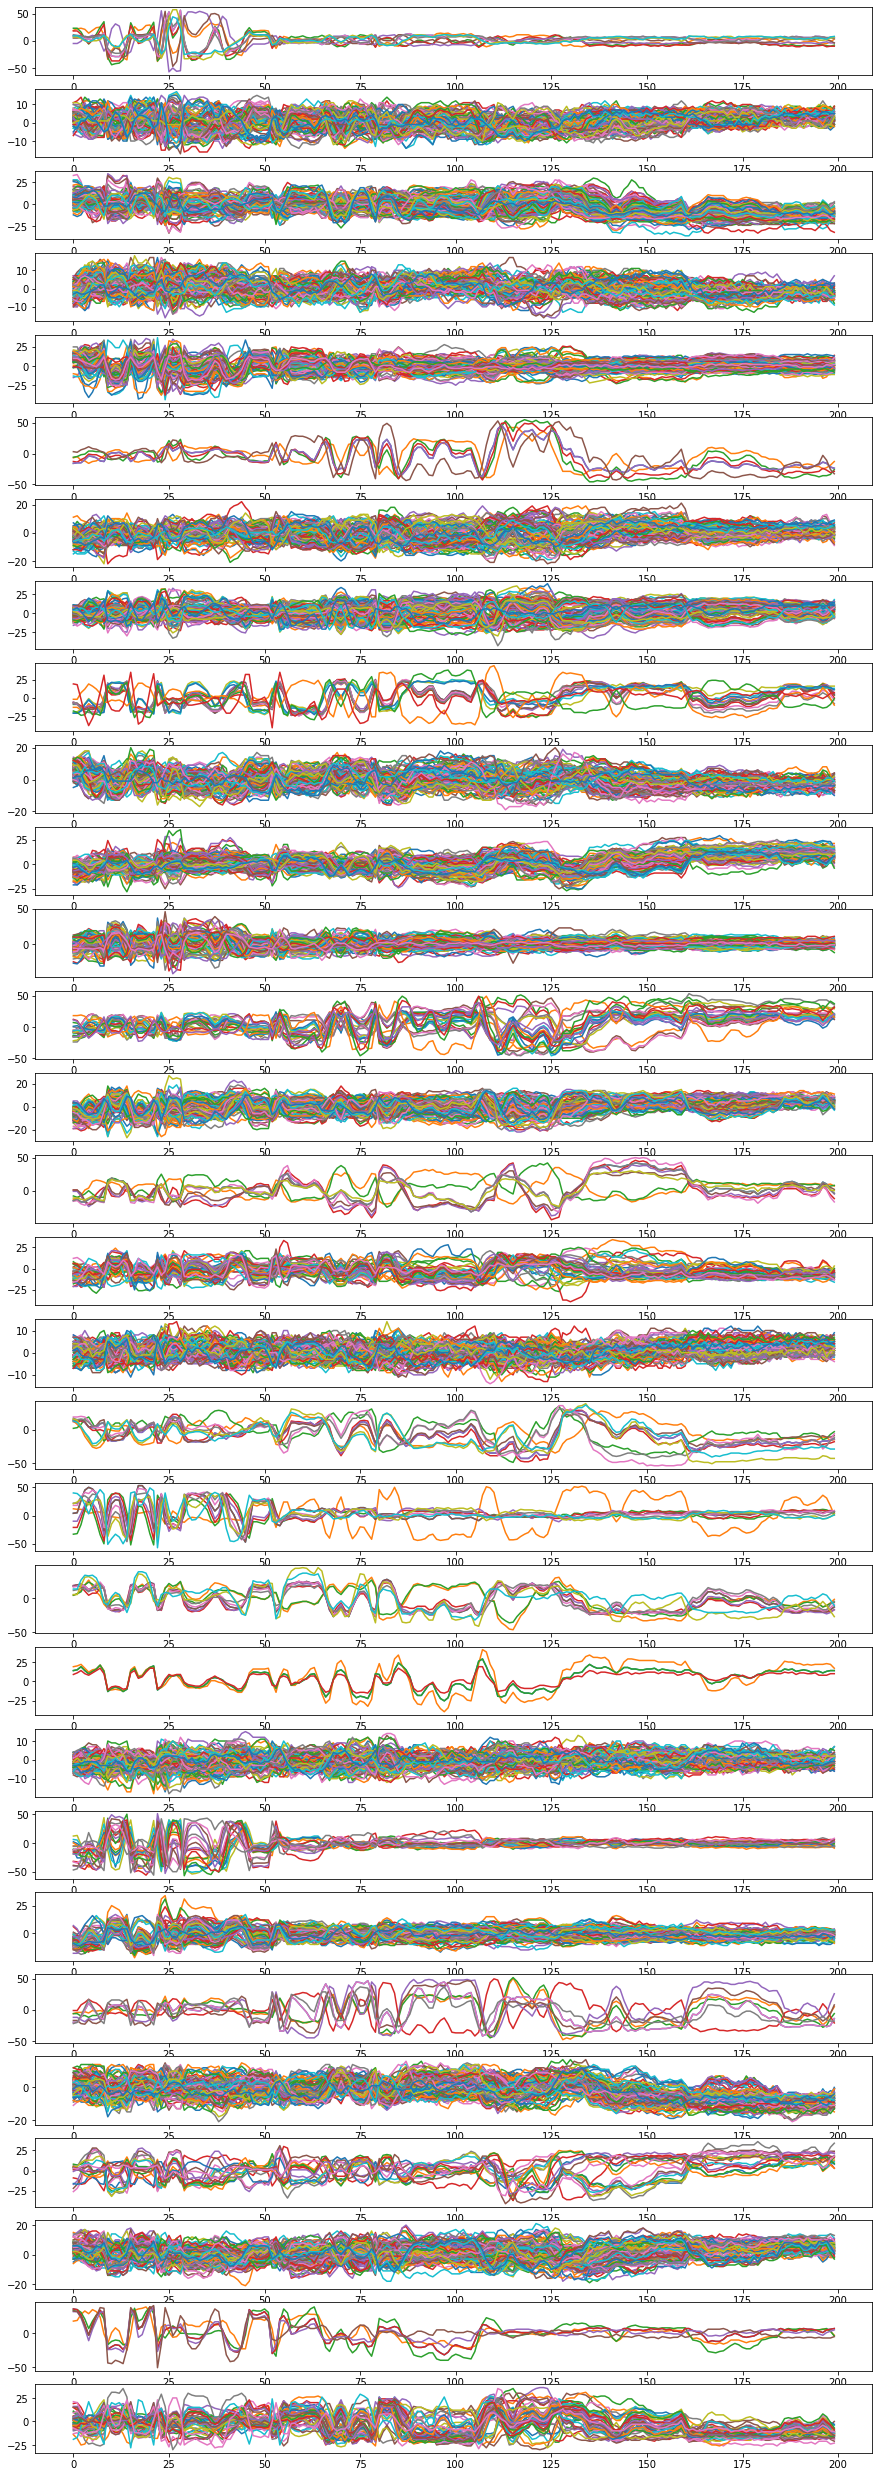

In [12]:
import pylab as plt
_, ax = plt.subplots(n_clusters, 1, num=9, figsize=(15, 45))
for i in range(n_clusters):
    ax[i].plot(km_dba.cluster_centers_[i].squeeze().T)
#     ax[i].plot(X[y==i].squeeze().mean(axis=0).T)
    ax[i].plot(X[y==i][:100].squeeze().T)

In [15]:
from tqdm import tqdm
perc = .1
n_clusters = 30
groups = {f'nc{n_clusters}': []}

for X in tqdm(data_train):
    X = X[..., np.newaxis]
    step = int(len(X) // (len(X) * perc))
    km_dba = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", 
                              max_iter=5, max_iter_barycenter=5,
                              random_state=0).fit(X[::step])
    y = km_dba.predict(X)
    groups[f'nc{n_clusters}'].append(y)

100%|██████████| 174/174 [10:56:32<00:00, 226.39s/it]   


In [22]:
import pickle
group_file = '/'.join((folder, 'BK_RF_P1_140_balance__20210203-175808_mimic_groups.pkl'))
with open(group_file, 'wb') as fp:
    pickle.dump(groups, fp)